In [1]:
from utils import *
import pandas as pd
import numpy as np

In [2]:
cnt_train = load_product('train', 'COCONUTS')
pnc_train = load_product('train', 'PINA_COLADAS')
cnt_val = load_product('val', 'COCONUTS')
pnc_val = load_product('val', 'PINA_COLADAS')

In [3]:
cnt_train['log_price'] = np.log(cnt_train['mid_price'])
pnc_train['log_price'] = np.log(pnc_train['mid_price'])
cnt_val['log_price'] = np.log(cnt_val['mid_price'])
pnc_val['log_price'] = np.log(pnc_val['mid_price'])

In [4]:
cnt_train.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread,lr,log_price
timestamp,,,,,,,,,,,,,,,,,,,
0,-1,COCONUTS,7999,162,NaN,NaN,NaN,NaN,8001,55,8002.0,107.0,NaN,NaN,8000.0,0.0,2,-0.000063,8.987197
100,-1,COCONUTS,7998,187,NaN,NaN,NaN,NaN,8001,187,NaN,NaN,NaN,NaN,7999.5,0.0,3,-0.000125,8.987134
200,-1,COCONUTS,7997,191,NaN,NaN,NaN,NaN,8000,191,NaN,NaN,NaN,NaN,7998.5,0.0,3,0.000125,8.987009
300,-1,COCONUTS,7998,187,NaN,NaN,NaN,NaN,8001,187,NaN,NaN,NaN,NaN,7999.5,0.0,3,-0.000125,8.987134
400,-1,COCONUTS,7997,186,NaN,NaN,NaN,NaN,8000,186,NaN,NaN,NaN,NaN,7998.5,0.0,3,-0.000188,8.987009


In [9]:
X = np.hstack((cnt_train['mid_price'].to_numpy().reshape(-1, 1), np.ones((cnt_train['mid_price'].shape[0], 1))))
Y = pnc_train['mid_price'].to_numpy().reshape(-1, 1)
params = np.linalg.inv(X.T @ X) @ X.T @ Y
params

array([[   1.92745146],
       [-439.16118212]])

In [10]:
spread = pnc_train['mid_price'] - params[0] * cnt_train['mid_price'] - params[1]

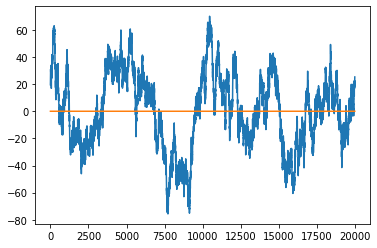

In [11]:
import matplotlib.pyplot as plt

plt.plot(spread.to_numpy())
plt.plot([0] * 20000)

In [14]:
import statsmodels.tsa.stattools as ts
result = ts.coint(pnc_train['log_price'], cnt_train['log_price'])
result

(-3.77587092330442,
 0.014593267114112641,
 array([-3.89698771, -3.33643554, -3.04466208]))

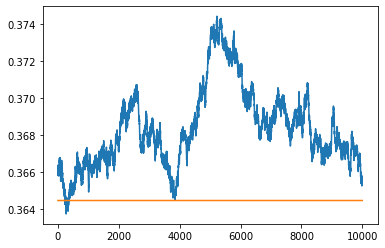

In [14]:
spread_oos = pnc_val['log_price'] - params[0] * cnt_val['log_price']
plt.plot(spread_oos.to_numpy())
plt.plot([params[1]] * 10000)